Importing the libraries which is required to load and read the UCI HAR dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


ModuleNotFoundError: No module named 'sklearn'

#Install 'pip install nbformat' in order to call another .ipynb file to any other .ipynb file.

No. of features: 561
Number of train duplicate data = 0
Number of test duplicate data = 0
Train Null Values = 0
Test Null Values = 0
(7352, 564) (2947, 564)


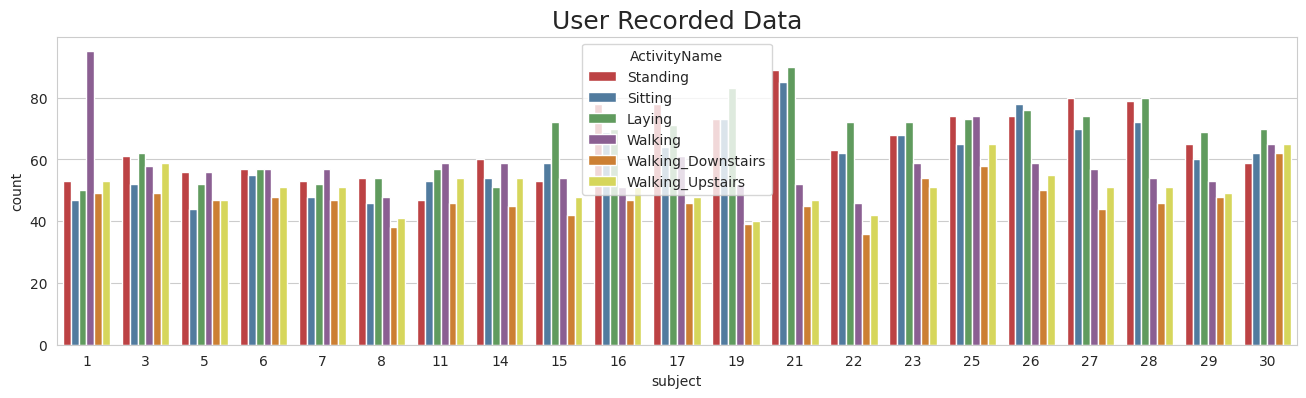

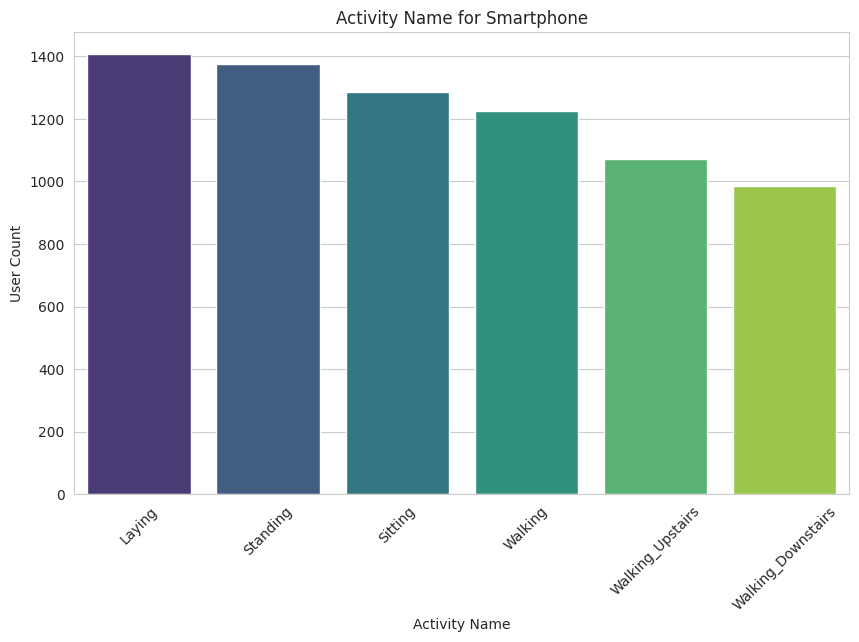

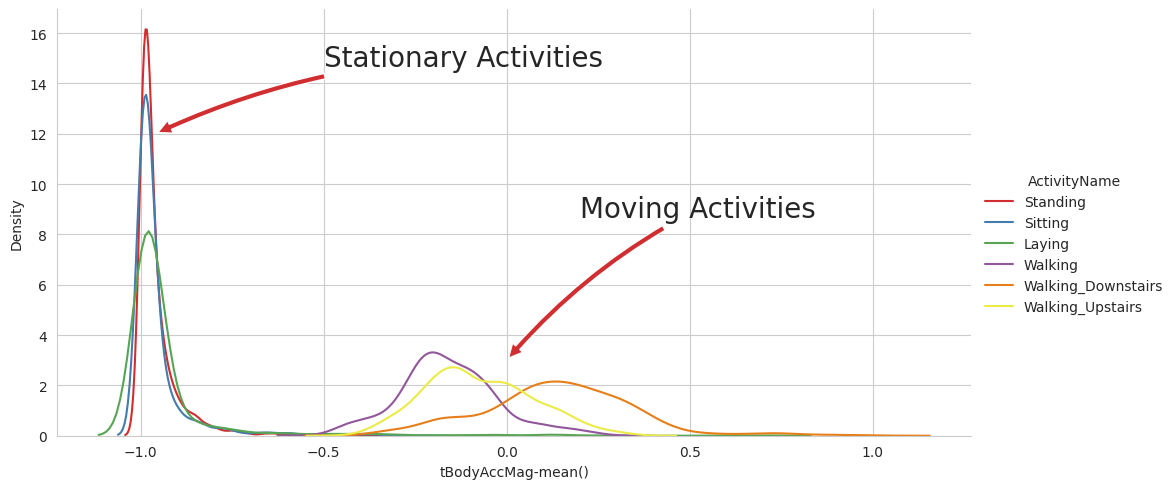

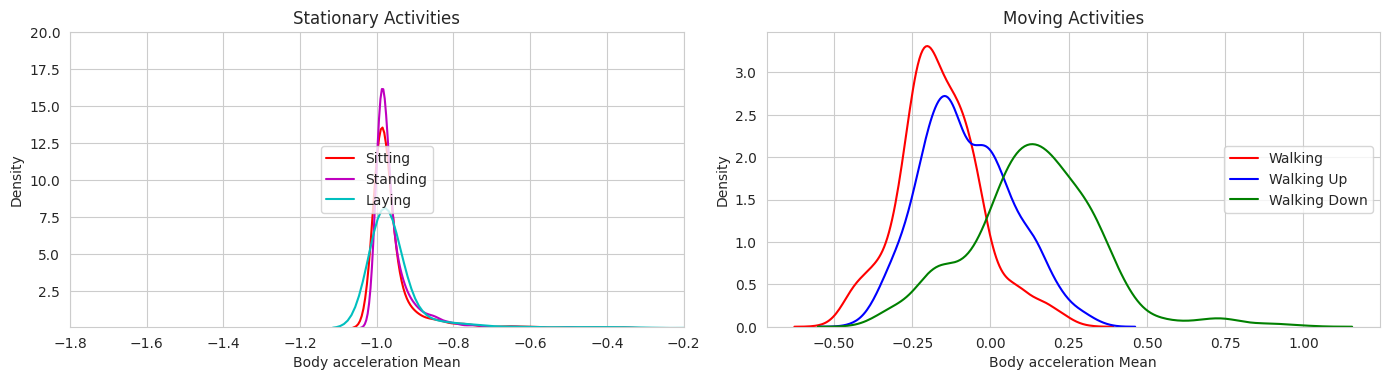

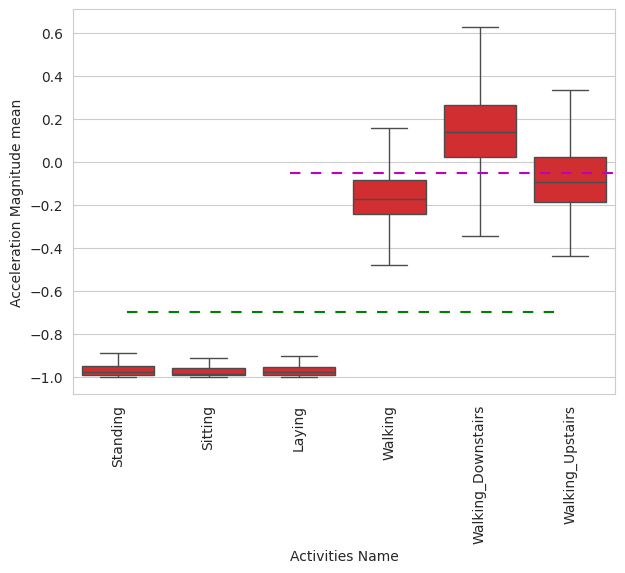

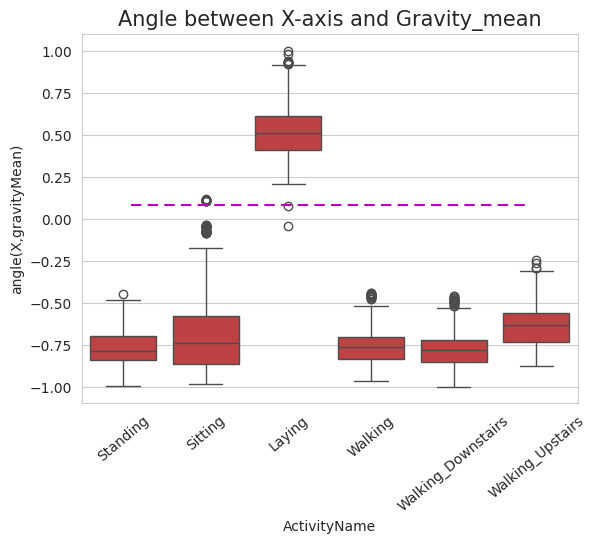

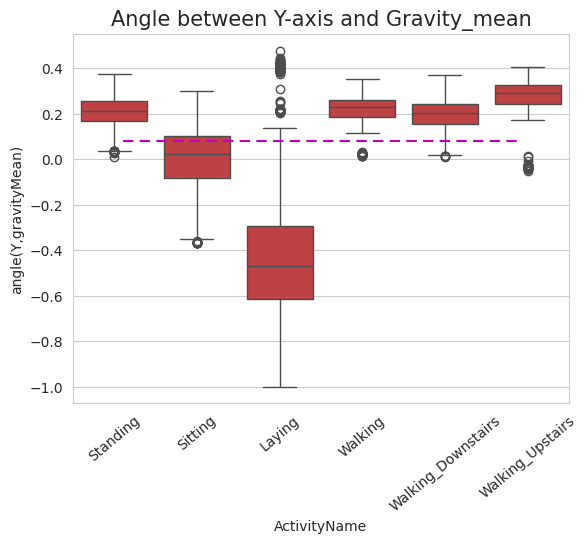


Performing t-SNE with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.204s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.118628
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 103.4701004, gradient norm = 0.0321804 (50 iterations in 1.347s)
[t-SNE] Iteration 100: error = 90.6935272, gradient norm = 0.0184889 (50 iterations in

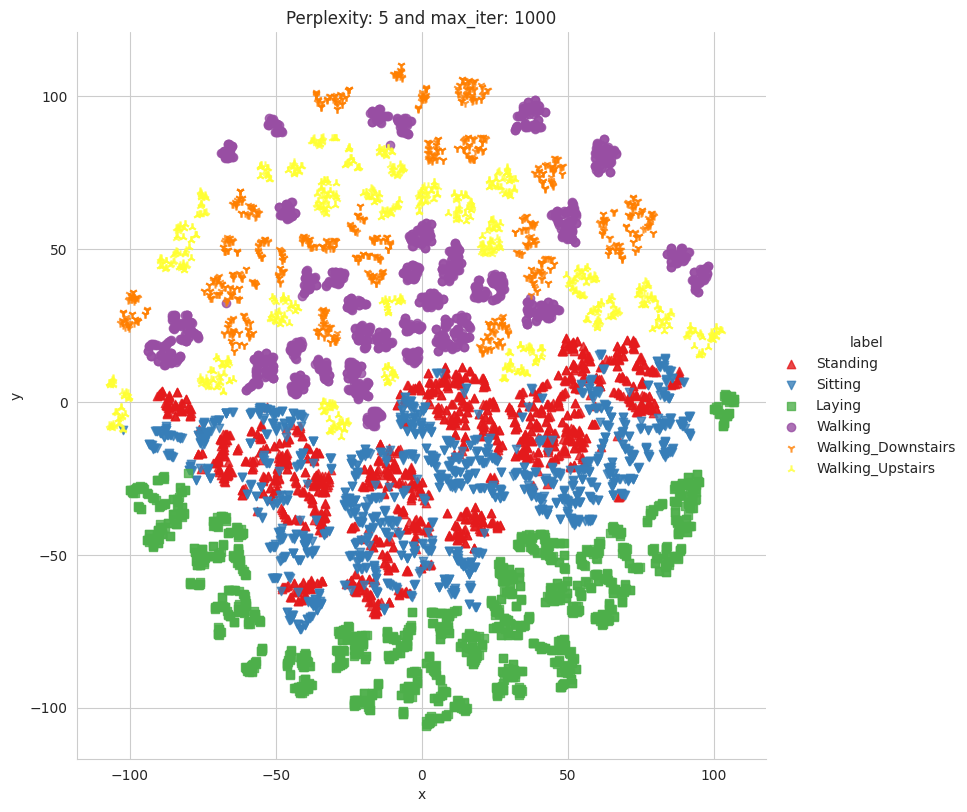

Done

Performing t-SNE with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.695976
[t-SNE] Computed conditional probabilities in 0.102s
[t-SNE] Iteration 50: error = 78.6340408, gradient norm = 0.0284765 (50 iterations in 1.240s)
[t-SNE] Iteration 100: error = 70.1311493, gradient norm = 0.0123721 (50 iteratio

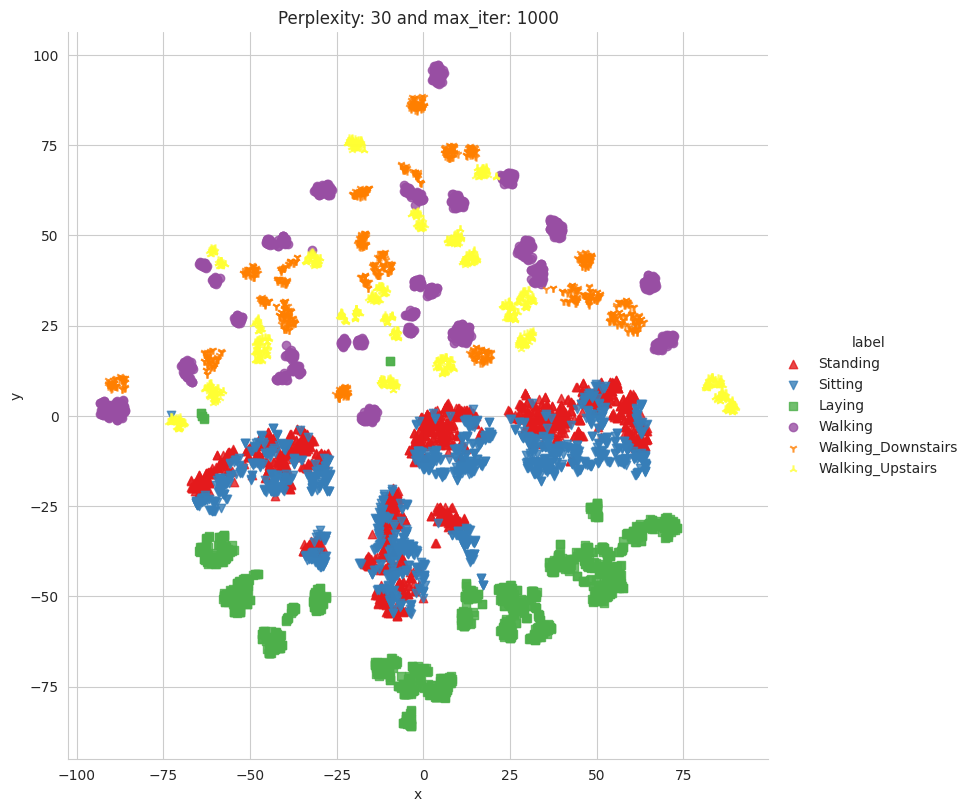

Done

Performing t-SNE with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.299s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.871463
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 72.5847168, gradient norm = 0.0251940 (50 iterations in 1.380s)
[t-SNE] Iteration 100: error = 65.7315674, gradient norm = 0.0095028 (50 iterati

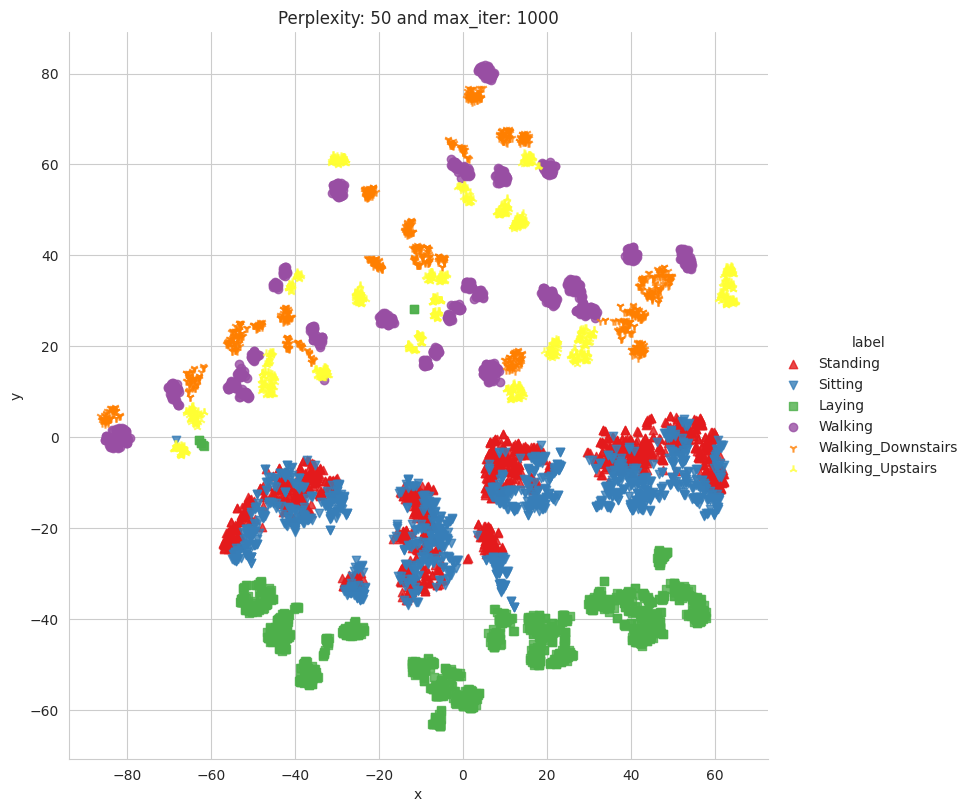

Done


In [4]:
%run BaseClass_UCI_HAR_DataAugmentation.ipynb

Implemeting traditional Data Augmentation Techniques.

01. Rotation Data Augmentation Technique.

In [5]:
def rotate_data(data, angle=15):
    """
    Rotates the data around one of the axes.
    
    Parameters:
        data (pd.DataFrame): The original data.
        angle (float): The angle by which to rotate the data.
        
    Returns:
        pd.DataFrame: The rotated data.
    """
    rotation_matrix = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                                [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    augmented_data = np.dot(data.values[:, :2], rotation_matrix)
    return pd.DataFrame(augmented_data, columns=data.columns[:2])

# Apply rotation to the training dataset
train_augmented_rotated = train.copy()
train_augmented_rotated.iloc[:, :2] = rotate_data(train.iloc[:, :2])

# Save the augmented dataset
train_augmented_rotated.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_rotated.csv', index=False,float_format='%.2f')


2. Scaling Data Augmentation Technique.

In [6]:
def scale_data(data, scaling_factor=1.2):
    """
    Scales the data by a random factor.
    
    Parameters:
        data (pd.DataFrame): The original data.
        scaling_factor (float): The scaling factor to multiply the data.
        
    Returns:
        pd.DataFrame: The scaled data.
    """
    augmented_data = data * scaling_factor
    return augmented_data

# Apply scaling augmentation to the training dataset
train_augmented_scaled = train.copy()
train_augmented_scaled.iloc[:, :-3] = scale_data(train.iloc[:, :-3])

# Save the augmented dataset
train_augmented_scaled.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_scaled.csv', index=False,float_format='%.2f')


3. Noise Data Augmentation Technique.

In [7]:
def add_noise(data, noise_factor=0.01):
    """
    Adds Gaussian noise to the data.
    
    Parameters:
        data (pd.DataFrame): The original data.
        noise_factor (float): The amount of noise to add.
        
    Returns:
        pd.DataFrame: The data with added noise.
    """
    noise = np.random.randn(*data.shape) * noise_factor
    augmented_data = data + noise
    return augmented_data

# Apply noise augmentation to the training dataset (excluding non-numerical columns)
train_augmented_noise = train.copy()
train_augmented_noise.iloc[:, :-3] = add_noise(train.iloc[:, :-3])

# Save the augmented dataset
train_augmented_noise.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_noise.csv', index=False,float_format='%.2f')

4. Time Warping Data Augmentation Technique.

In [8]:
def time_warp(data, warping_factor=1.5):
    """
    Warps the time series data by stretching/compressing the time axis.
    
    Parameters:
        data (pd.DataFrame): The original data (only numerical columns).
        warping_factor (float): The factor by which to warp the time axis.
        
    Returns:
        pd.DataFrame: The time-warped data.
    """
    time_warped_data = {}

    # Loop over each column in the DataFrame
    for column in data.columns:
        column_data = data[column].values
        
        # Ensure the data is a 1D array
        if column_data.ndim == 1 and len(column_data) > 1:
            # Apply zoom only along the time axis (1D)
            warped_column = zoom(column_data, warping_factor)
            time_warped_data[column] = warped_column[:len(column_data)]  # Keep the original length
        else:
            time_warped_data[column] = column_data

    # Convert the dictionary back to a DataFrame
    time_warped_data_df = pd.DataFrame(time_warped_data)

    return time_warped_data_df

# Example usage
# Assume train contains the original DataFrame
train_augmented_time_warp = time_warp(train.iloc[:, :-3], warping_factor=1.2)

# Save the augmented dataset
train_augmented_time_warp.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_timewarp.csv', index=False,float_format='%.2f')

5. Jitter Data Augmention Technique.

In [9]:
def jitter_data(data, jitter_factor=0.02):
    """
    Adds random jitter to the data.
    
    Parameters:
        data (pd.DataFrame): The original data.
        jitter_factor (float): The factor to add jitter.
        
    Returns:
        pd.DataFrame: The data with jitter added.
    """
    jitter = np.random.normal(loc=0, scale=jitter_factor, size=data.shape)
    augmented_data = data + jitter
    return augmented_data

# Apply jittering to the training dataset
train_augmented_jitter = train.copy()
train_augmented_jitter.iloc[:, :-3] = jitter_data(train.iloc[:, :-3])

# Save the augmented dataset
train_augmented_jitter.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_jitter.csv', index=False,float_format='%.2f')

6. Cropping Data Augmentaion Technique.

In [10]:
def crop_data(data, crop_size=0.9):
    """
    Crops the data by keeping only a portion of it.
    
    Parameters:
        data (pd.DataFrame): The original data.
        crop_size (float): The fraction of data to keep (between 0 and 1).
        
    Returns:
        pd.DataFrame: The cropped data.
    """
    crop_length = int(data.shape[0] * crop_size)
    start = np.random.randint(0, data.shape[0] - crop_length)
    return data.iloc[start:start + crop_length, :]

# Apply cropping to the training dataset
train_augmented_cropped = train.copy()
train_augmented_cropped = train_augmented_cropped.groupby('subject').apply(lambda x: crop_data(x)).reset_index(drop=True)

# Save the augmented dataset
train_augmented_cropped.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_cropped.csv', index=False,float_format='%.2f')

C:\Users\bhanu\AppData\Local\Temp\ipykernel_9528\2610374729.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_augmented_cropped = train_augmented_cropped.groupby('subject').apply(lambda x: crop_data(x)).reset_index(drop=True)


7. Resampling Data Augmentation Technique.

In [11]:
def resample_data(data, new_length):
    """
    Resamples each column in the dataset to a new length.
    
    Parameters:
        data (pd.DataFrame): The original data (only numerical columns).
        new_length (int): The desired length of the resampled data.
        
    Returns:
        pd.DataFrame: The resampled data.
    """
    resampled_data = {}

    # Loop over each column in the DataFrame
    for column in data.columns:
        column_data = data[column]

        # Ensure the column is numerical and has more than one element
        if isinstance(column_data.iloc[0], (int, float)) and len(column_data) > 1:
            # Resample the time series data in the column
            resampled_column = np.interp(
                np.linspace(0, len(column_data) - 1, new_length),
                np.arange(len(column_data)),
                column_data
            )
            resampled_data[column] = resampled_column
        else:
            # If the column is not suitable for resampling, extend the existing values
            resampled_data[column] = np.tile(column_data.values, new_length // len(column_data) + 1)[:new_length]

    # Convert the dictionary back to a DataFrame
    resampled_data_df = pd.DataFrame(resampled_data)

    return resampled_data_df

# Example usage
# Assume train contains the original DataFrame
new_length = int(train.shape[0] * 1.1)  # Resample to 110% of the original length
train_augmented_resampled = resample_data(train.iloc[:, :-3], new_length)

# Save the augmented dataset
train_augmented_resampled.to_csv('./UCI HAR Dataset/Data/train_dataset_augmented_resampled.csv', index=False,float_format='%.2f')

Combining the traditional data augmentation technquies to perform the further steps.

In [12]:
# Combine the datasets from all traditional augmentation techniques
combined_train = pd.concat([
    train_augmented_rotated,
    train_augmented_scaled,
    train_augmented_noise,
    train_augmented_time_warp,
    train_augmented_jitter,
    train_augmented_cropped,
    train_augmented_resampled
])

# Save the combined augmented dataset
combined_train.to_csv('./UCI HAR Dataset/Data/combined_train_augmented.csv', index=False,float_format='%.2f')


Handling combined dataset for training the models

In [13]:
# Confirming the data type to avoid further error.
print(combined_train.dtypes)

# Check for unique data in each column and no duplication
for column in combined_train.columns:
    unique_types = combined_train[column].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Column '{column}' has mixed types: {unique_types}")

# Example handling based on data types
for column in combined_train.columns:
    if combined_train[column].dtype == 'object':  # If the column is of object type (likely strings)
        combined_train[column].fillna('missing', inplace=True)
    else:  # For numeric columns
        combined_train[column].fillna(combined_train[column].mean(), inplace=True)

# Verify that there are no more NaN values
print('Updated Numbers of NaNs:')
print(combined_train.isnull().sum().sum())



tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                 float64
Activity                float64
ActivityName             object
Length: 564, dtype: object
Column 'ActivityName' has mixed types: [<class 'str'> <class 'float'>]
Updated Numbers of NaNs:
0


Implementation of the models: Random Forest, Support Vector Machine (SVM) and Neural Network. I have selected these three models for traditional data augmentation techqnies because RF is robust to overfitting and handle large datasets, SVM effective in high-dimensional spaces and suitable for binary classification problem and Neural Network is due to their complex learning capacity.

Evaluating Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Estimator: RandomForestClassifier(max_depth=20, random_state=42)
Accuracy: 0.8283937421047517
F1 Score: 0.8246380355384573
Classification Report:
                    precision    recall  f1-score   support

            Laying       0.89      0.92      0.91      1419
           Sitting       0.90      0.84      0.87      1251
          Standing       0.92      0.85      0.88      1284
           Walking       0.78      0.95      0.86      1220
Walking_Downstairs       0.79      0.95      0.86      1015
  Walking_Upstairs       0.79      0.94      0.86      1016
           missing       0.78      0.65      0.71      3086

          accuracy                           0.83     10291
         macro avg       0.84      0.87      0.85     10291
      weighted avg       0.83      0.83      0.82     10291



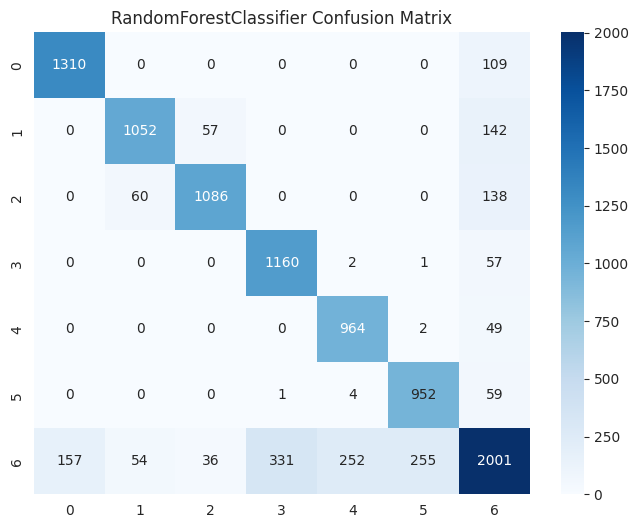

Evaluating Neural Network
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
Accuracy: 0.6935186084928578
F1 Score: 0.6619215590906463
Classification Report:
                    precision    recall  f1-score   support

            Laying       0.73      0.90      0.80      1419
           Sitting       0.70      0.96      0.81      1251
          Standing       0.72      0.81      0.76      1284
           Walking       0.76      0.84      0.80      1220
Walking_Downstairs       0.78      0.85      0.81      1015
  Walking_Upstairs       0.75      0.89      0.81      1016
           missing       0.49      0.26      0.34      3086

          accuracy                           0.69     10291
         macro avg       0.70      0.79      0.73     10291
      weighted avg       0.66      0.69      0.66     10291



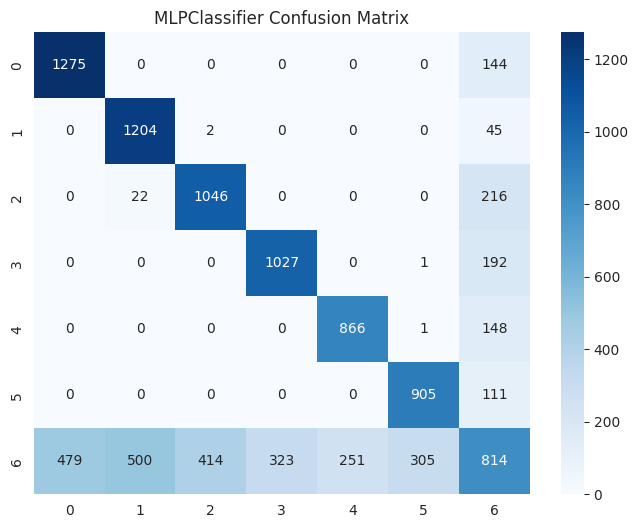

Evaluating Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packa

Best Estimator: LogisticRegression(C=0.01, random_state=42)
Accuracy: 0.6676707802934603
F1 Score: 0.5988946617250126
Classification Report:
                    precision    recall  f1-score   support

            Laying       0.72      0.98      0.83      1419
           Sitting       0.68      0.84      0.75      1251
          Standing       0.67      0.88      0.76      1284
           Walking       0.70      0.94      0.80      1220
Walking_Downstairs       0.71      0.93      0.81      1015
  Walking_Upstairs       0.70      0.89      0.78      1016
           missing       0.36      0.10      0.16      3086

          accuracy                           0.67     10291
         macro avg       0.65      0.79      0.70     10291
      weighted avg       0.59      0.67      0.60     10291



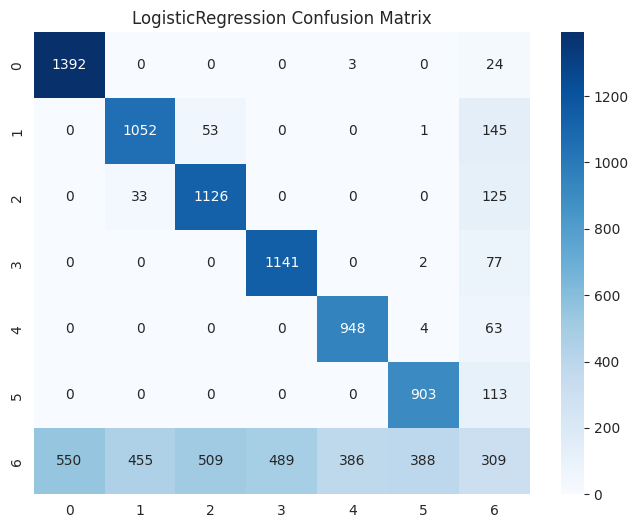

Evaluating Decision Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [14]:
# Split the data into features and labels
X = combined_train.drop(columns=['Activity', 'ActivityName', 'subject'])
y = combined_train['ActivityName']

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their hyperparameter grids (excluding SVM)
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

param_grids = {
    "Random Forest": {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    "Neural Network": {'hidden_layer_sizes': [(50,), (100,), (100, 50)], 'max_iter': [300, 500]},
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'none']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30]},
}

# Function to perform grid search and evaluate model
def perform_model(model, param_grid, X_train, X_val, y_train, y_val):
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Training and prediction
    y_pred = best_model.predict(X_val)
    
    # Evaluation
    print(f"Best Estimator: {best_model}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(f"F1 Score: {f1_score(y_val, y_pred, average='weighted')}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f'{best_model.__class__.__name__} Confusion Matrix')
    plt.show()

# Evaluate each model (excluding SVM)
for model_name in models:
    print(f"Evaluating {model_name}")
    perform_model(models[model_name], param_grids[model_name], X_train, X_val, y_train, y_val)
